# My First ML Project

# Phising Website Detection Model Based on Supervised Learning Using RandomForestClassifier

# Importing Packages

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Importing Dataset

In [71]:
df=pd.read_csv('https://raw.githubusercontent.com/Abhilakshya627/Phising-Website-Detection/refs/heads/main/Dataset/archive/dataset_phishing.csv')
df=df.drop(['url'],axis=1) #dropping the url column
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


# Data PreProcessing

## Seperating X and Y

In [72]:
x=df.drop(['status'],axis=1)
y=LabelEncoder().fit_transform(df['status']) #encoding the status column

## Splitting Data into Testing and Training Set

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) #splitting the dataset into training(80%) and testing(20%) data

# Making ML Model

## Random Forest Classifer

### Training the Model

In [74]:
rfc=RandomForestClassifier(n_estimators=100) #creating a random forest classifier
rfc.fit(x_train,y_train) #fitting the model

RandomForestClassifier()

### Predicting Y for Training X and Testing X

In [75]:
y_test_pred_rfc=rfc.predict(x_test) #predicting the test data
y_train_pred_rfc=rfc.predict(x_train) #predicting the train data


### Plotting Model Features

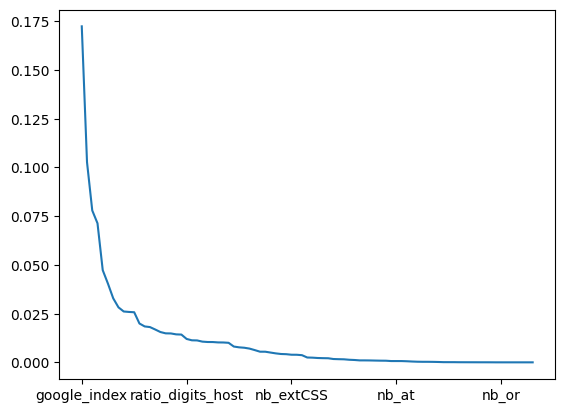

In [76]:
plot=pd.Series(rfc.feature_importances_,index=x.columns).sort_values(ascending=False) #plotting the feature importance
plot.plot(kind='line')
plt.show()

### Accuracy

In [77]:
accuracy_rfc=accuracy_score(y_test,y_test_pred_rfc) #calculating the accuracy of the model
print('Accuracy of the model:',accuracy_rfc)

Accuracy of the model: 0.9715660542432196


### Model Report

In [79]:
model_report=pd.DataFrame({'Model':['Random Forest Classifier'],'Accuracy':[accuracy_rfc]}) #creating a dataframe of the model and its accuracy
model_report.to_csv('model_accuracy.csv',index=True) #saving the dataframe to a csv file
model_report.head()

,Model,Accuracy
0,Random Forest Classifier,0.971566


# Deploying ML Model